# An introduction to Imagery and Raster data

The `arcgis.raster` module contains classes and raster analysis functions for working with raster data and imagery layers. Before we go any further, what is raster data?

**Raster data** is made up of a grid of cells, where each cell or pixel can have a value. An **image** is a representation of the raster data when displayed. In its simplest form, a raster consists of a matrix of cells organized into rows and columns (or a grid) where each cell contains a value representing information, such as temperature, brightness value in a particular band (such as red, green, blue) etc. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps. When you view a raster data, you are viewing an image of that raster data. Thus, you may think of image as a display terminology and raster as the data model.

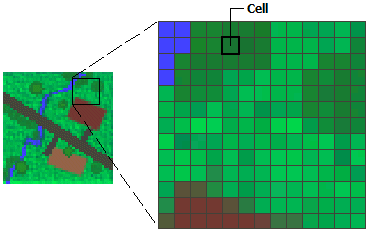

Raster data is useful for storing data that varies continuously, as in a image of Earth captured from an airplane or satellite, a surface of chemical concentrations, or an elevation surface. It is useful to understand the difference between **raster** and **imagery** data as it is often used interchangeably. Images of Earth captured from airborne and spaceborne platforms are typically called as **Imagery** data. Thus, satellite images, aerial photographs, drone images are called **imagery** data. All imagery data are rasters behind the scenes, but not all rasters are considered as imagery (for instance, temperature or rainfall interpolation raster is typically not considered as imagery data, but just as raster data).

**Pixels vs Cells**: Often pixels and cells are used interchangeably and both refer to the smallest unit of information in raster data. Pixels are often used when describing imagery data, while cells are used for raster data. They both refer to the value contained in a cell.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imagery-Layers-and-ArcGIS-Image-Server" data-toc-modified-id="Imagery-Layers-and-ArcGIS-Image-Server-1">Imagery Layers and ArcGIS Image Server</a></span><ul class="toc-item"><li><span><a href="#What-is-ArcGIS-Image-Server?" data-toc-modified-id="What-is-ArcGIS-Image-Server?-1.1">What is ArcGIS Image Server?</a></span></li><li><span><a href="#Distributed-Raster-Analysis-on-ArcGIS-Image-Server" data-toc-modified-id="Distributed-Raster-Analysis-on-ArcGIS-Image-Server-1.2">Distributed Raster Analysis on ArcGIS Image Server</a></span></li></ul></li><li><span><a href="#Working-with-Imagery-Layers" data-toc-modified-id="Working-with-Imagery-Layers-2">Working with Imagery Layers</a></span><ul class="toc-item"><li><span><a href="#Creating-an-ImageryLayer-object-in-ArcGIS-API-for-Python" data-toc-modified-id="Creating-an-ImageryLayer-object-in-ArcGIS-API-for-Python-2.1">Creating an <code>ImageryLayer</code> object in ArcGIS API for Python</a></span></li><li><span><a href="#Viewing-ImageryLayers" data-toc-modified-id="Viewing-ImageryLayers-2.2">Viewing <code>ImageryLayer</code>s</a></span></li><li><span><a href="#Properties-of-an-ImageryLayer" data-toc-modified-id="Properties-of-an-ImageryLayer-2.3">Properties of an <code>ImageryLayer</code></a></span><ul class="toc-item"><li><span><a href="#Spectral-Resolution---Querying-the-band-count-and-wavelengths" data-toc-modified-id="Spectral-Resolution---Querying-the-band-count-and-wavelengths-2.3.1">Spectral Resolution - Querying the band count and wavelengths</a></span></li><li><span><a href="#Band-properties-of-non-imagery-rasters" data-toc-modified-id="Band-properties-of-non-imagery-rasters-2.3.2">Band properties of non-imagery rasters</a></span></li><li><span><a href="#Spatial-Resolution---Querying-the-cell-size" data-toc-modified-id="Spatial-Resolution---Querying-the-cell-size-2.3.3">Spatial Resolution - Querying the cell size</a></span></li><li><span><a href="#Radiometric-Resolution---Querying-quantization-level" data-toc-modified-id="Radiometric-Resolution---Querying-quantization-level-2.3.4">Radiometric Resolution - Querying quantization level</a></span></li><li><span><a href="#Temporal-Resolution" data-toc-modified-id="Temporal-Resolution-2.3.5">Temporal Resolution</a></span></li><li><span><a href="#Other-properties-of-ImageryLayers" data-toc-modified-id="Other-properties-of-ImageryLayers-2.3.6">Other properties of <code>ImageryLayer</code>s</a></span></li></ul></li></ul></li><li><span><a href="#Filtering-and-querying-ImageryLayers" data-toc-modified-id="Filtering-and-querying-ImageryLayers-3">Filtering and querying <code>ImageryLayer</code>s</a></span><ul class="toc-item"><li><span><a href="#No-category-filter" data-toc-modified-id="No-category-filter-3.1">No category filter</a></span></li></ul></li></ul></div>

## Imagery Layers and ArcGIS Image Server

When using the ArcGIS API for Python, you typically work with raster data that is served out as a web service (called an **Imagery Layer / Image Service**), rather than with raster data that is local to your computer. To create and serve and Image Service, you need an instance of [ArcGIS Image Server](https://enterprise.arcgis.com/en/server/latest/get-started/windows/what-is-arcgis-image-server-.htm) attached to your [ArcGIS Enterprise](https://enterprise.arcgis.com/en/). Most of what you will learn in this guide will require you to have an Image Server set up in your GIS environment.

### What is ArcGIS Image Server?
ArcGIS Image Server is part of ArcGIS Enterprise, and provides a distributed computing and storage system that allows you to serve out and perform analysis on large collections of imagery and raster data. It allows you to assemble, process, analyze, and manage large collections of overlapping, multiresolution imagery and raster data from different sensors, sources, and time periods.

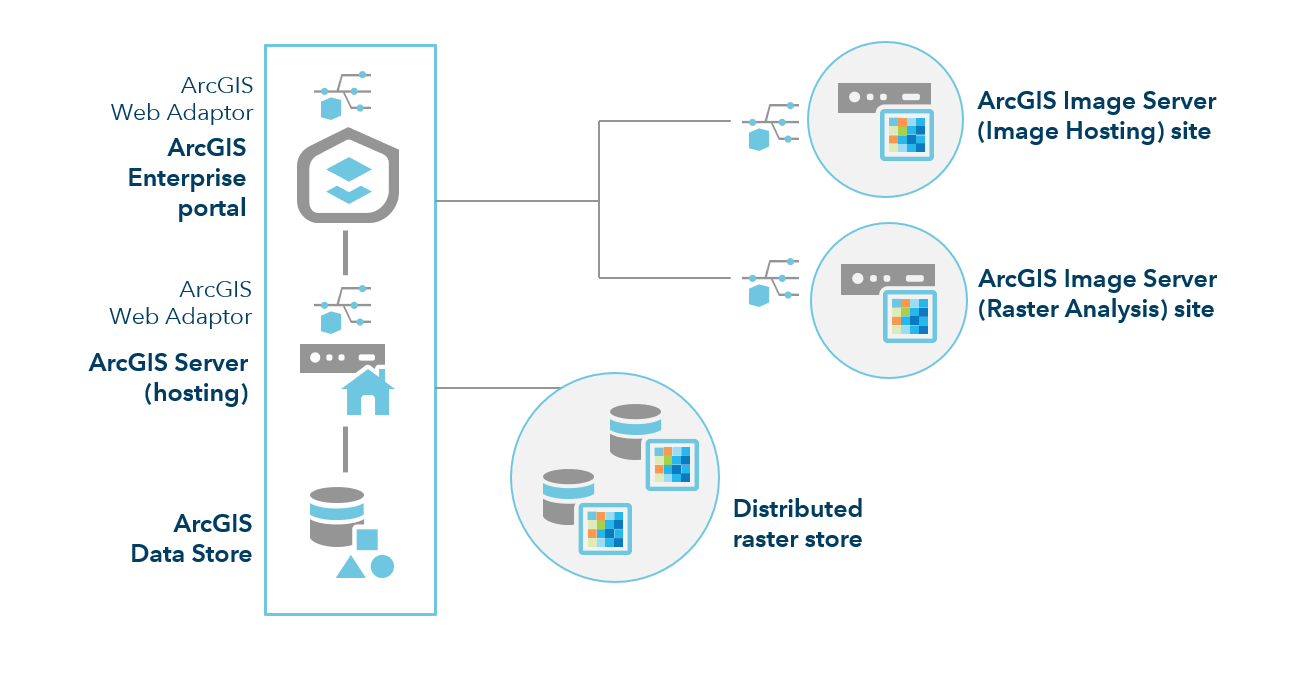

<center>
    Learn more about ArcGIS deployment patterns <a href="https://enterprise.arcgis.com/en/get-started/latest/windows/additional-server-deployment.htm">here</a>
</center>

### Distributed Raster Analysis on ArcGIS Image Server
You use the `arcgis.raster` module of the Python API to manage, visualize and analyze Imagery Layers served from an ArcGIS Image Server. Since the Python API works with Imagery Layers, computations are performed on the server side. These computations could either be dynamic operations (processing on demand) or distributed raster analyses jobs that can execute in parallel across multiple machines and instances and gets written to a distributed storage. This topic is explained later in this guide in detail. This pattern of performing server-side computation allows you to work with very large collections of data without worrying about the processing capacity of your current environment that is running Python.

By pairing raster analytics with distributed cloud computing, image processing and analysis jobs that used to take days or weeks can be completed in minutes or hours, bringing imagery projects that were impossibly large or daunting within reach [[1]](https://www.esri.com/arcgis-blog/products/arcgis-enterprise/analytics/propel-productivity-to-the-next-level-with-raster-analytics/).

## Working with Imagery Layers
An image service provides access to raster data through a web service. In this section, we will learn how to access Imagery Layers using the Python API.

First, let us import the `arcgis` library and make an anonymous connection to ArcGIS Online. We will then search for public Imagery Layers and inspect them.

In [2]:
from arcgis.gis import GIS
gis = GIS() # connect to ArcGIS Online as an anonymous user

To search for Imagery Layers, specify the `item_type` argument accordingly:

In [3]:
# search for public Imagery Layers on ArcGIS Online
search_result = gis.content.search(query="", item_type='Imagery Layer', max_items=7)
from IPython.display import display
for result in search_result:
    display(result)

<Item title:"Terrain" type:Imagery Layer owner:esri>

<Item title:"USA NAIP Imagery: Natural Color" type:Imagery Layer owner:esri>

<Item title:"Terrain: Elevation Tinted Hillshade" type:Imagery Layer owner:esri>

<Item title:"Terrain: Multi-Directional Hillshade" type:Imagery Layer owner:esri>

<Item title:"Sentinel-2 Views" type:Imagery Layer owner:esri>

<Item title:"Terrain: Slope Map" type:Imagery Layer owner:esri>

<Item title:"Ground Surface Elevation - 30m" type:Imagery Layer owner:esri>

As you noticed above, a number of imagery layers are available publicly on ArcGIS Online.

> **Note**: The results of the search operation are fuzzy and may be different when you execute them.

Let us refine the search and look for [Landsat 8](https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-overview/) imagery data.

In [4]:
search_result = gis.content.search(query="Landsat 8 Views", item_type='Imagery Layer', max_items=7)
from IPython.display import display
for result in search_result:
    display(result)

<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>

<Item title:"Landsat 8 Pansharpened" type:Imagery Layer owner:esri>

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>

<Item title:"Landsat 8 Panchromatic" type:Imagery Layer owner:esri>

<Item title:"Panchromatic Landsat" type:Imagery Layer owner:esri>

<Item title:"Pansharpened Landsat" type:Imagery Layer owner:esri>

<Item title:"Landsat 8 Imagery: NDVI Colorized" type:Imagery Layer owner:esri>

For the rest of this topic, let us work with the "Landsat 8 Views" Imagery Layer.

In [5]:
landsat_item = [e for e in search_result if e.title=='Landsat 8 Views'][0]
landsat_item

<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>

### Creating an `ImageryLayer` object in ArcGIS API for Python

The primary object that represents imagery layers is the `arcgis.raster.ImageryLayer` object. You can create this object with one of two ways:
  1. Using the `ImageryLayer` constructor, by passing it a URL and a `GIS` connection object. `
  2. Using the `layers` property off the `Item` object, where the item corresponds to an imagery layer.
  
We prescribe the latter pattern while using the Python API as it is cleaner and user friendly.

In [8]:
# query the `layers` property off the Landsat item we just created
landsat_item.layers

[<ImageryLayer url:"https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer">]

The `landsat_item` discussed here points to an Image Service shared publicly on ArcGIS Online. Image Services can have multiple Imagery Layers. Thus, the `layers` property off the `landsat_item` always returns a `List`, even if there is just `1` Imagery Layer in that service. Let us inspect this service.

In [9]:
landsat_layer = landsat_item.layers[0]
type(landsat_layer)

arcgis.raster._layer.ImageryLayer

### Viewing `ImageryLayer`s

You can quickly visualize or render the default extent of an `ImageryLayer` object by simply querying that variable in a Jupyter Notebook environment.

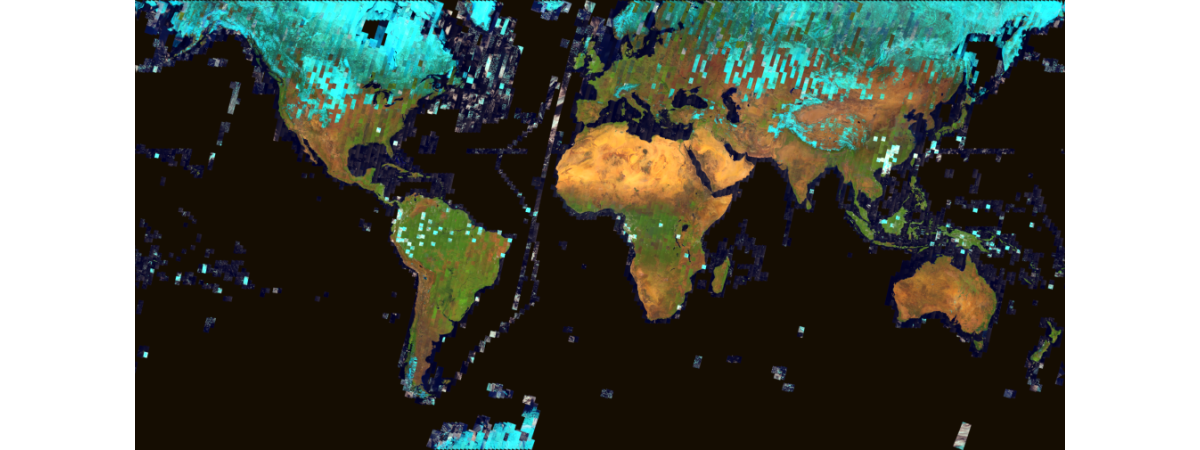

In [10]:
landsat_layer

This gives you a static rendered version of the layer. To view this layer in an interactive fashion, you can create a map widget and add this as a layer to it.


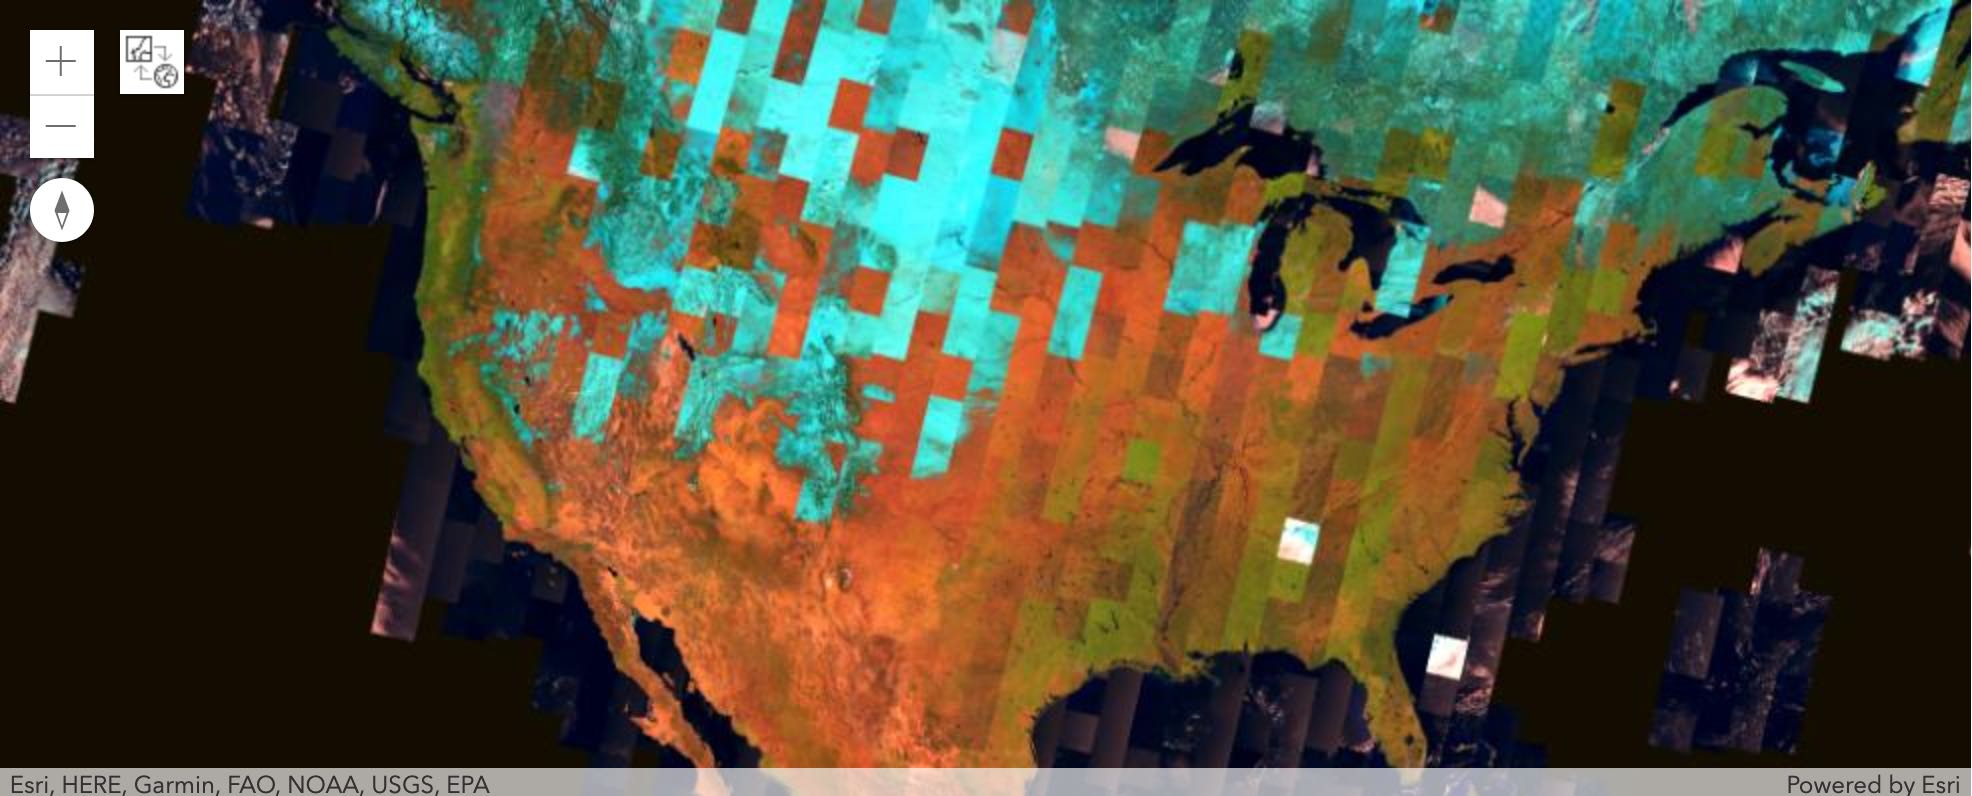

In [24]:
map1 = gis.map('USA', zoomlevel=4)
map1.add_layer(landsat_layer)
map1

We have only scratched the surface of what is possible when visualizing imagery layers. More on this topic will be discussed later.

### Properties of an `ImageryLayer`
The `ImageryLayer` is the primary object model we will work with when handling raster and imagery data. This object exposes a number of properties and methods. To take a quick look, type `landsat_layer.` and hit `TAB` while in Jupyter Notebook (or ArcGIS Notebook) environment. The intellisense will list these properties and methods. For convenience, the cell below prints a list of these properties and methods:

In [7]:
from pprint import pprint as pretty_print

disp_list = dir(landsat_layer)
disp_list = [e for e in disp_list if not e.startswith('_')]
pretty_print(disp_list, compact=True, width=100)

['attribute_table', 'band_count', 'blend', 'cache_manager', 'calculate_volume', 'catalog_item',
 'colormap', 'columns', 'compute_class_stats', 'compute_histograms', 'compute_pixel_location',
 'compute_stats_and_histograms', 'compute_tie_points', 'draw_graph', 'export_image', 'extent',
 'filter', 'filter_by', 'filtered_rasters', 'first', 'fromitem', 'get_download_info',
 'get_raster_file', 'get_samples', 'height', 'histograms', 'identify', 'key_properties', 'last',
 'legend', 'max', 'mean', 'measure', 'min', 'mosaic_by', 'mosaic_rule', 'multidimensional_info',
 'pixel_type', 'project', 'properties', 'query', 'rasters', 'rows', 'save', 'service', 'set_filter',
 'sum', 'tiles', 'to_features', 'url', 'validate', 'width']


> **Note**: The properties exposed will vary with different Image Services, as not all properties will be applicable for all types of services. Further, depending upon the version of the ArcGIS Image Server serving these layers, some additional or fewer properties may appear. However, you would be able to see some common properties.

#### Spectral Resolution - Querying the band count and wavelengths
An Imagery Layer can support multiple bands. In general, imaging sensors aboard remote sensing platforms, collect reflected energy in multiple wavelengths, called bands. For instance, [Landsat 8](https://www.usgs.gov/land-resources/nli/landsat/landsat-8?qt-science_support_page_related_con=0#qt-science_support_page_related_con) satellite houses two instruments - OLI (Optical Land Imager) which collects imagery data in 9 bands ranging from $0.43\mu m$ to $2.29 \mu m$ in wavelength and a TIRS (Thermal InfraRed Sensor) that collects thermal emitted energy in two bands ranging from $10.6\mu m$ to $12.59\mu m$ [[2]](https://www.usgs.gov/media/images/bandpass-wavelengths-all-landsat-sensors).

![landsat and sentinel spectral resolution]( 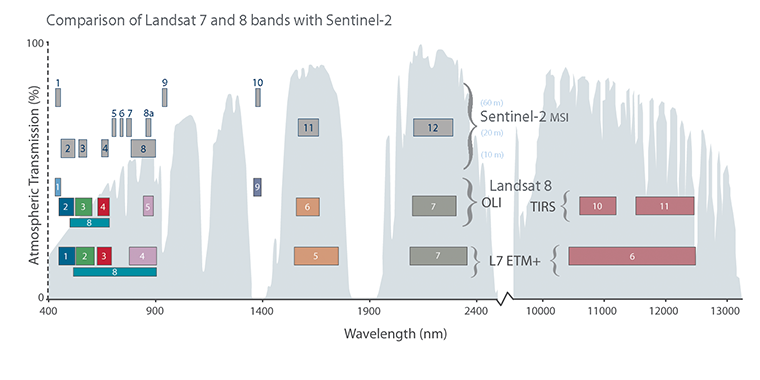)

<center><i> Image credit: <a href="https://www.usgs.gov/media/images/comparison-landsat-7-and-8-bands-sentinel-2">USGS</a>. Spectral bands of imaging sensors on Landast and Sentinel satellites. <a href='https://gisgeography.com/atmospheric-window/'>Atmospheric Windows</a> in the electromagnetic spectrum is shown in gray.
    </i></center>

 Thus, you can query the Landsat Imagery Layer from [Esri Living Atlas](https://livingatlas.arcgis.com/en/) service, to find the number of bands and their corresponding wavelengths.

In [8]:
landsat_layer.band_count

11

To view the bands and their wavelengths, call the `band_wavelength` property. This returns a Pandas DataFrame object. If Pandas is unavailable, it returns the same data as a Dict object.

> Note: For this property to work correctly, the wavelength information needs to be published with the Image Service.

In [11]:
landsat_layer.band_wavelengths

,BandName,WavelengthMin,WavelengthMax
0,CoastalAerosol,430,450
1,Blue,450,510
2,Green,530,590
3,Red,640,670
4,NearInfrared,850,880
5,ShortWaveInfrared_1,1570,1650
6,ShortWaveInfrared_2,2110,2290
7,Cirrus,1360,1380


The wavelength units in the example above is nanometers. The sensitivity of a sensor to distinguish signal (electromagnetic radiation in this case) from different wavelengths is called the **Spectral Resolution**. [Hyperspectral](http://www.csr.utexas.edu/projects/rs/hrs/hyper.html) sensors such as [AVIRIS](https://aviris.jpl.nasa.gov/aviris/index.html) which record reflected energy in hundreds of narrow bands have a higher spectral resolving power (resolution) compared to multispectral sensors such as Landsat which measure in fewer, broad bands.

Let us connect to an ArcGIS Enterprise instance to inspect the wavelengths of an Imagery Layer containing hyperspectral data from AVIRIS.

In [10]:
entp_gis = GIS(profile='your_entp_profile')
entp_gis

GIS @ https://pythonapi.playground.esri.com/portal version:7.1

In [11]:
aviris_item = entp_gis.content.search('omaha aviris', item_type='Imagery Layer')[0]
aviris_layer = aviris_item.layers[0]

In [12]:
aviris_layer.band_count

224

The AVIRIS is a hyperspectral sensor collects images in `224` bands. Let us display the first `5` and last `5` bands.

In [13]:
aviris_layer.band_wavelenths.head(5)

,KIND,HAS_TABLE,wavelength,WavelengthMin,WavelengthMax,SourceBandIndex
0,BAND,0,365.9298,365.9298,365.9298,0
1,BAND,0,375.5940,375.5940,375.5940,1
2,BAND,0,385.2625,385.2625,385.2625,2
3,BAND,0,394.9355,394.9355,394.9355,3
4,BAND,0,404.6129,404.6129,404.6129,4


In [14]:
aviris_layer.band_wavelengths.tail(5)

,KIND,HAS_TABLE,wavelength,WavelengthMin,WavelengthMax,SourceBandIndex
219,BAND,0,2457.348,2457.348,2457.348,219
220,BAND,0,2467.273,2467.273,2467.273,220
221,BAND,0,2477.196,2477.196,2477.196,221
222,BAND,0,2487.117,2487.117,2487.117,222
223,BAND,0,2497.036,2497.036,2497.036,223


#### Band properties of non-imagery rasters
**Note**: Imagery Layers can represent rasters that are not remotely sensed images. For instance, consider the [digital elevation model (DEM)](https://learn.arcgis.com/en/related-concepts/digital-elevation-models.htm) of the Arctic from Esri Living Atlas below.

In [13]:
arctic_dem = gis.content.get('db38a951a2b643478a942ab22cd78fc6')
arctic_dem

<Item title:"Arctic DEM" type:Imagery Layer owner:esri>

In [14]:
arctic_dem_layer = arctic_dem.layers[0]
arctic_dem_layer.band_count

2

This layer contains two bands, but no wavelengths associated with it as it represents elevation information.

In [24]:
arctic_dem_layer.band_wavelengths

#### Spatial Resolution - Querying the cell size

Spatial resolution is the measure of the finest detail distinguishable in a raster. [[3]](https://www.e-education.psu.edu/geog883/node/421). It is the area on the ground that each cell covers [[4]](https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/intro-multispectral-data/), also known as the [Ground Sample Distance (GSD)](https://www.e-education.psu.edu/glossary/taxonomy/term/2). Thus, the smaller the area each pixel covers, the better is the resolving power, hence a better spatial resolution. Sensors such as [WorldView-2](https://en.wikipedia.org/wiki/WorldView-2) collect imagery with a very high spatial resolution of `0.46m`, compared to OLI on Landsat 8, which collects images with `30m` resolution for the optical multispectral bands and `100m` for thermal infrared bands and `10m` for panchromatic bands.

![spatial-resolution-car]( 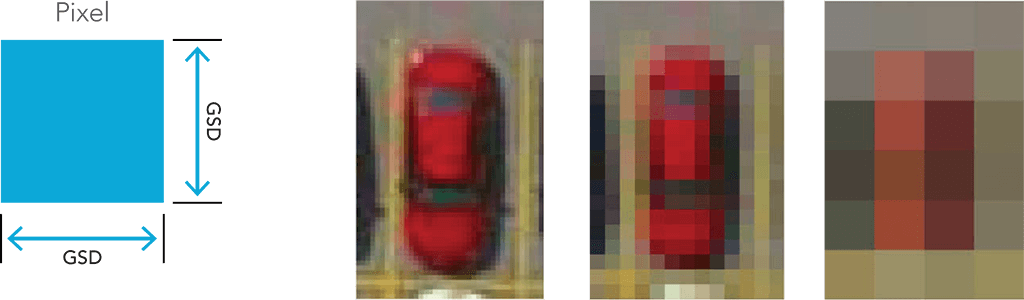)

<center><i>A car is represented with three different pixel sizes or GSDs but displayed at the same scale. The more pixels on the car or the smaller the GSD, the better fidelity to resolve the car. </i></center>

Although, data is collected at different spatial resolutions, the imagery is often resampled to a specific resolution by the data publisher.

![spatial resolution - cell size]( 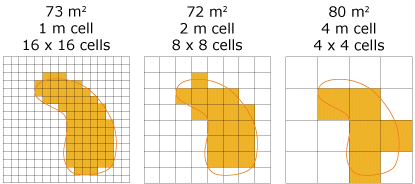)

 You can determine this by querying the pixel size properties as shown below:

In [15]:
(landsat_layer.properties.pixelSizeX, landsat_layer.properties.pixelSizeY)

(29.99999618963752, 30)

The units of the pixel size is in the units of the spatial reference the service is published with. We can determine the spatial reference by querying:

In [16]:
landsat_layer.properties.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

The `latestWkid` of `3857` corresponds to [Web Mercator](https://epsg.io/3857) whose units are in meters. By a similar account, the spatial reference of the Arctic DEM image service is `2m` and it's spatial reference [WGS 84 Polar Stereographic](https://epsg.io/5936).

In [17]:
print(arctic_dem_layer.properties.spatialReference)
print((arctic_dem_layer.properties.pixelSizeX, arctic_dem_layer.properties.pixelSizeY))

{
  "wkid": 5936,
  "latestWkid": 5936
}
(2, 2)


#### Radiometric Resolution - Querying quantization level
Radiometric resolution is the ability of the sensor to detect differences in energy levels in a particular wavelength. A high radiometric resolution allows the sensor to distinguish even subtle differences in reflected or emitted energy. If a sensor used `8` bits to store data, then it can represent $2^{8} = 256$ shades of gray in a particular band. Similar to spatial resolution, radiometric resolution could be up or down sampled by the data publisher. You can find the quantization level by querying the `pixelType` property.

![]( 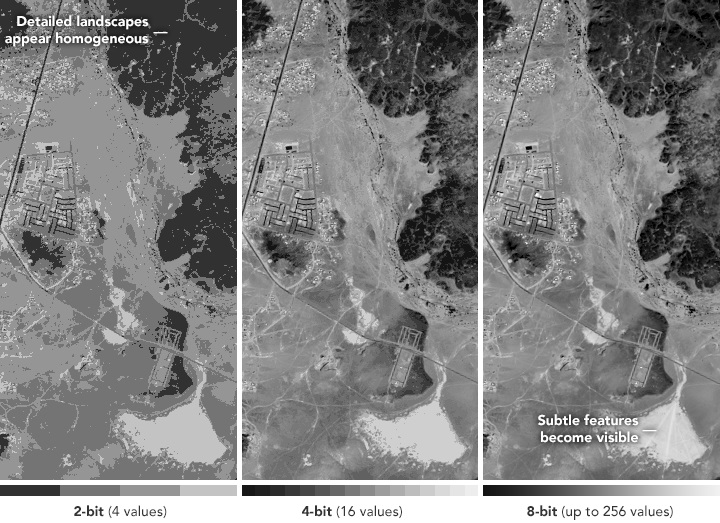)

<center><i>Image credit: <a href="https://earthobservatory.nasa.gov/images/91071/space-archaeology-in-the-realm-of-resolution">NASA Earth Observatory</a>. Graphic shows how the image quality improves as bit depth (radiometric resolution) is increased.
    </i></center>

In [18]:
landsat_layer.pixel_type

'S16'

`S16` stands for Signed 16 bit integer.

In [19]:
arctic_dem_layer.pixel_type

'F32'

`F32` stands for 32 bit floating point. The higher the bit depth (`32` bit is higher than `16` or `8` bit), the higher the radiometric resolution. Also, the higher the bit depth, the larger is the dataset file size.

#### Temporal Resolution
Temporal resolution is the periodicity with which a particular location on Earth is imaged by a sensor. It is also called as revisit time or repeat cycle [[3]](https://www.e-education.psu.edu/geog883/node/421). The repeat cycle is determined by a number of factors including orbital height, inclination, width or field of view of the imaging camera, latitude of the place on ground. The Landsat 8 satellite had a temporal resolution of `16` day revisit at the equator [[5]](https://www.usgs.gov/land-resources/nli/landsat/landsat-8). The Sentinel-1 mission has a achieved a temporal resolution of 6 days with two satellites working together [[6]](https://www.copernicus.eu/en/media/images/sentinel-1-constellation) as shown in the video below:

<iframe src="https://www.esa.int/spaceinvideos/content/view/embedjw/473937" width="640" height="360" frameborder="0"></iframe>

<center><i> Video credit: <a href="https://www.copernicus.eu/en/media/images/sentinel-1-constellation">Copernicus Earth Observation Programme</a>
    </i></center>

#### Other properties of `ImageryLayer`s
Imagery Layers contain a number of additional properties than those discussed above. To inspect them, you can query `ImageryLayer.properties` which returns you a `PropertyMap` object that you can navigate using the `.` (dot) operator. You can additionally turn that into a Python `dict` and query just the keys as shown below:

In [15]:
dict(landsat_layer.properties).keys()

dict_keys(['currentVersion', 'serviceDescription', 'name', 'description', 'extent', 'initialExtent', 'fullExtent', 'pixelSizeX', 'pixelSizeY', 'bandCount', 'pixelType', 'minPixelSize', 'maxPixelSize', 'copyrightText', 'serviceDataType', 'minValues', 'maxValues', 'meanValues', 'stdvValues', 'objectIdField', 'fields', 'capabilities', 'defaultMosaicMethod', 'allowedMosaicMethods', 'sortField', 'sortValue', 'mosaicOperator', 'maxDownloadSizeLimit', 'defaultCompressionQuality', 'defaultResamplingMethod', 'maxImageHeight', 'maxImageWidth', 'maxRecordCount', 'maxDownloadImageCount', 'maxMosaicImageCount', 'allowRasterFunction', 'rasterFunctionInfos', 'rasterTypeInfos', 'mensurationCapabilities', 'hasHistograms', 'hasColormap', 'hasRasterAttributeTable', 'minScale', 'maxScale', 'exportTilesAllowed', 'hasMultidimensions', 'supportsStatistics', 'supportsAdvancedQueries', 'editFieldsInfo', 'ownershipBasedAccessControlForRasters', 'allowComputeTiePoints', 'useStandardizedQueries', 'advancedQueryCa

You can inspect any property (for instance, `fields` as shown below) by simply querying it in a cell.

In [20]:
from pprint import pprint as pretty_print

all_fields = landsat_layer.properties.fields  # returns a list of dictionaries
field_names = [f['name'] for f in all_fields] # get field names for printing
pretty_print(field_names, compact=True)

['OBJECTID', 'Name', 'MinPS', 'MaxPS', 'LowPS', 'HighPS', 'Category',
 'ProductName', 'Shape', 'WRS_Path', 'WRS_Row', 'Best', 'AcquisitionDate',
 'SunAzimuth', 'SunElevation', 'CloudCover', 'PR', 'Latest', 'DayOfYear',
 'Month', 'SensorName', 'dataset_id', 'LANDSAT_PRODUCT_ID']


## Filtering and querying `ImageryLayer`s

Imagery layers are capable of serving a collection of individual scenes. You can combine overlapping, time-variant imagery from multiple devices, sensors, resolutions, bands, and raster formats - all in a single imagery layer. Thus, imagery layers such as the 'Landsat' layer (which we have been demonstrating so far) cover the entire Earth with multi-temporal and multi-spectral scenes collected from individual passes of the satellite sensor.

![]( 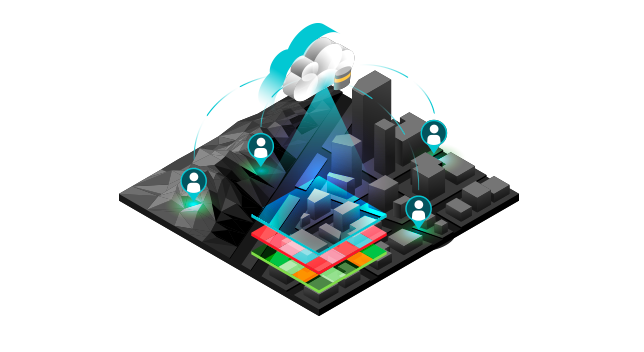)

The section below shows you how you can apply filters and query Imagery Layers to understand what scenes are available and what their properties are.

Let us begin by geocoding an area of interest - Redlands, CA in this case.

In [25]:
from arcgis.geocoding import geocode
redlands = geocode('Redlands, CA', out_sr = landsat_layer.properties.spatialReference)[0]
redlands['extent']

{'xmin': -13052832.571464855,
 'ymin': 4026436.3359408537,
 'xmax': -13036579.925809037,
 'ymax': 4046053.3775858423}

Next, let us use the `geometry` module to create a spatial filter using the extent of 'Redlands' city in California.

In [26]:
from arcgis import geometry
redlands_spatial_filter = geometry.filters.overlaps(redlands['extent'])

Next, let us define a time interval of one year - from 01/01/2015 - 31/12/2015

In [22]:
# landsat_layer.query(geometry_filter = redlands_spatial_filter, return_count_only=True)
dict(landsat_layer.properties).keys()

dict_keys(['currentVersion', 'serviceDescription', 'name', 'description', 'extent', 'initialExtent', 'fullExtent', 'pixelSizeX', 'pixelSizeY', 'bandCount', 'pixelType', 'minPixelSize', 'maxPixelSize', 'copyrightText', 'serviceDataType', 'minValues', 'maxValues', 'meanValues', 'stdvValues', 'objectIdField', 'fields', 'capabilities', 'defaultMosaicMethod', 'allowedMosaicMethods', 'sortField', 'sortValue', 'mosaicOperator', 'maxDownloadSizeLimit', 'defaultCompressionQuality', 'defaultResamplingMethod', 'maxImageHeight', 'maxImageWidth', 'maxRecordCount', 'maxDownloadImageCount', 'maxMosaicImageCount', 'allowRasterFunction', 'rasterFunctionInfos', 'rasterTypeInfos', 'mensurationCapabilities', 'hasHistograms', 'hasColormap', 'hasRasterAttributeTable', 'minScale', 'maxScale', 'exportTilesAllowed', 'hasMultidimensions', 'supportsStatistics', 'supportsAdvancedQueries', 'editFieldsInfo', 'ownershipBasedAccessControlForRasters', 'allowComputeTiePoints', 'useStandardizedQueries', 'advancedQueryCa

In [27]:
landsat_layer.properties.maxRecordCount

1000

In [28]:
landsat_filtered = landsat_layer.filter_by(where="(Category = 1) AND (CloudCover <=0.10)",
                                           geometry = redlands_spatial_filter)

In [33]:
type(landsat_filtered)

arcgis.raster._layer.ImageryLayer

In [37]:
landsat_filtered.rows

646176.0

In [38]:
landsat_layer.rows

646176.0

In [39]:
%%time
query_result = landsat_filtered.query()

CPU times: user 15.6 ms, sys: 3.05 ms, total: 18.7 ms
Wall time: 53.2 s


In [40]:
type(query_result)

arcgis.features.feature.FeatureSet

In [41]:
query_result

<FeatureSet> 46 features

In [42]:
sdf1 = query_result.sdf
sdf1.head()

,OBJECTID,Name,MinPS,MaxPS,LowPS,HighPS,Category,ProductName,WRS_Path,WRS_Row,...,PR,Latest,DayOfYear,Month,SensorName,dataset_id,LANDSAT_PRODUCT_ID,Shape_Length,Shape_Area,SHAPE
0,2403391,LC80400372018364LGN00,0,300,30,120,1,L1TP,40,37,...,40037,None,364,12,Landsat 8,Landsat8,LC08_L1TP_040037_20181230_20181230_01_RT,890955.213534,4.956749e+10,"{'rings': [[[-12909588.7465, 4005657.460199997..."
1,2608587,LC80400372014321LGN01,0,300,30,120,1,L1TP,40,37,...,40037,None,321,11,Landsat 8,Landsat8,LC08_L1TP_040037_20141117_20170302_01_T1,890981.537772,4.957098e+10,"{'rings': [[[-12911931.8134, 4005911.929899998..."
2,2806232,LC80400372016215LGN01,0,300,30,120,1,L1TP,40,37,...,40037,None,215,8,Landsat 8,Landsat8,LC08_L1TP_040037_20160802_20170222_01_T1,891030.372143,4.957656e+10,"{'rings': [[[-12909430.1445, 4005607.473099999..."
3,2986242,LC80400372013270LGN01,0,300,30,120,1,L1TP,40,37,...,40037,None,270,9,Landsat 8,Landsat8,LC08_L1TP_040037_20130927_20170308_01_T1,890801.100077,4.955186e+10,"{'rings': [[[-12911426.493900001, 4005816.0273..."
4,2247406,LC80400372018060LGN00,0,300,30,120,1,L1TP,40,37,...,40037,None,60,3,Landsat 8,Landsat8,LC08_L1TP_040037_20180301_20180308_01_T1,890892.224731,4.956062e+10,"{'rings': [[[-12910588.4318, 4005667.088600002..."


In [43]:
sdf1.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

In [48]:
sdf1['AcquisitionDate'].sort_values()

10   2013-04-20 18:24:21
3    2013-09-27 18:24:25
29   2013-11-14 18:24:15
36   2014-01-01 18:23:56
18   2014-01-17 18:23:42
7    2014-04-07 18:22:41
27   2014-05-09 18:22:10
19   2014-08-29 18:22:38
20   2014-09-14 18:22:42
37   2014-09-30 18:22:42
21   2014-10-16 18:22:47
1    2014-11-17 18:22:45
22   2014-12-19 18:22:41
30   2015-01-04 18:22:36
13   2015-03-09 18:22:13
11   2015-03-25 18:22:04
23   2015-04-26 18:21:51
38   2015-08-16 18:22:17
39   2015-09-17 18:22:30
24   2015-10-03 18:22:34
8    2015-11-20 18:22:42
40   2016-02-08 18:22:33
25   2016-02-24 18:22:27
2    2016-08-02 18:22:34
41   2016-08-18 18:22:39
42   2016-10-05 18:22:50
12   2016-10-21 18:22:54
28   2016-11-06 18:22:53
43   2016-11-22 18:22:54
26   2016-12-08 18:22:51
44   2017-01-25 18:22:39
9    2017-04-15 18:22:00
31   2017-05-01 18:21:50
14   2017-09-06 18:22:40
15   2017-10-24 18:22:51
32   2017-12-11 18:22:42
33   2017-12-27 18:22:44
34   2018-01-28 18:22:28
4    2018-03-01 18:22:15
16   2018-04-18 18:21:50


### No category filter

In [49]:
landsat_filtered2 = landsat_layer.filter_by(geometry = redlands_spatial_filter)

HTTPError: HTTP Error 504: GATEWAY_TIMEOUT

In [28]:
%%time
qr2 = landsat_filtered2.query()
sdf2 = qr2.sdf
sdf2.shape

HTTPError: HTTP Error 504: GATEWAY_TIMEOUT

In [40]:
sentinel_items = gis.content.search('modis', item_type='Imagery Layer')
sentinel_items

[<Item title:"MODIS True Color - Terra Surface Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"MODIS True Color - Aqua Corrected Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"[Time-enabled] Flood Detection 3 Observations Composite, Daily, MODIS" type:Imagery Layer owner:jkirkend_NASA>,
 <Item title:"MODIS True Color - Terra Corrected Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"[Time-enabled] Flood Detection 2 Observations Composite, Daily, MODIS" type:Imagery Layer owner:jkirkend_NASA>,
 <Item title:"[Time-enabled] Flood Detection 1 Observation Image, Daily, MODIS" type:Imagery Layer owner:jkirkend_NASA>,
 <Item title:"MODIS Burn Scars and Flooding - Aqua Corrected Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"MODIS Vegetation - Aqua Surface Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"MODIS Vegetation - Terra Surface Reflectance" type:Imagery Layer owner:esri>,
 <Item title:"MODIS Water States - Terra Corrected Reflecta

In [41]:
sentinel_item = sentinel_items[0]
sentinel_item

<Item title:"MODIS True Color - Terra Surface Reflectance" type:Imagery Layer owner:esri>

In [42]:
sentinel_layer = sentinel_item.layers[0]

In [43]:
sentinel_layer.band_count

3

**References**
1. [Propel Productivity to the Next Level with Raster Analytics](https://www.esri.com/arcgis-blog/products/arcgis-enterprise/analytics/propel-productivity-to-the-next-level-with-raster-analytics/).
2. [Bandpass Wavelengths for all Landsat Sensors](https://www.usgs.gov/media/images/bandpass-wavelengths-all-landsat-sensors)
3. [GEOG 883: Remote Sensing Image Analysis and Applications - Key Definitions](https://www.e-education.psu.edu/geog883/node/421)
4. [Multispectral remote sensing in Python - Univ. of Colorado](https://www.earthdatascience.org/courses/earth-analytics-python/multispectral-remote-sensing-in-python/intro-multispectral-data4)
5. [USGS - Landsat Missions - Landsat 8](https://www.usgs.gov/land-resources/nli/landsat/landsat-8)
6. [Copernicus Earth Obersvation Programme - Sentinel-1](https://www.copernicus.eu/en/media/images/sentinel-1-constellation)